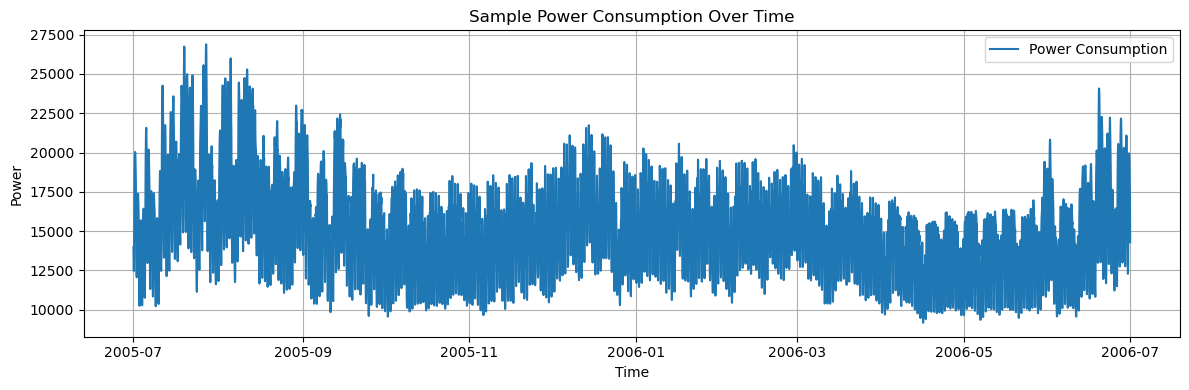

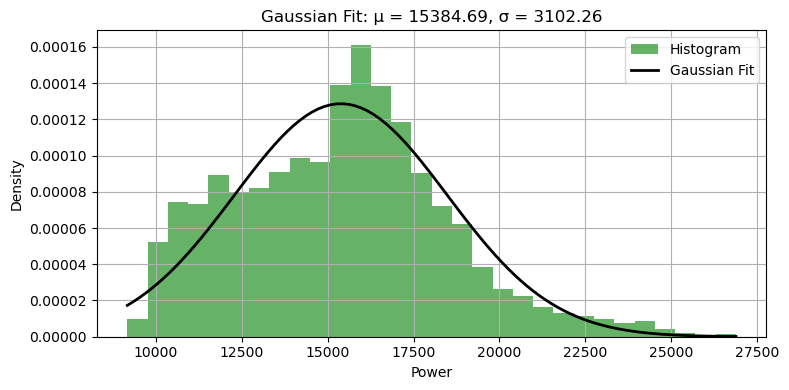

Mean Squared Error between histogram and Gaussian model: 0.0000000002


In [2]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

# Step 1: Load the Excel data
file_path = "datan.xlsx"  # Make sure the file is in the same directory as your notebook
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Step 2: Extract power values
power_values = df['Power'].values
time_values = pd.to_datetime(df['Datetime'])

# Step 3: Plot power consumption over time
plt.figure(figsize=(12, 4))
plt.plot(time_values, power_values, label='Power Consumption')
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Sample Power Consumption Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Histogram and Gaussian Fit
mu, std = norm.fit(power_values)
xmin, xmax = min(power_values), max(power_values)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(8, 4))
hist_vals, bins, _ = plt.hist(power_values, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')
plt.title(f"Gaussian Fit: μ = {mu:.2f}, σ = {std:.2f}")
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Calculate MSE between histogram and Gaussian fit
hist_density, bin_edges = np.histogram(power_values, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
gaussian_at_bins = norm.pdf(bin_centers, mu, std)
mse = mean_squared_error(hist_density, gaussian_at_bins)

# Display MSE
print(f"Mean Squared Error between histogram and Gaussian model: {mse:.10f}")


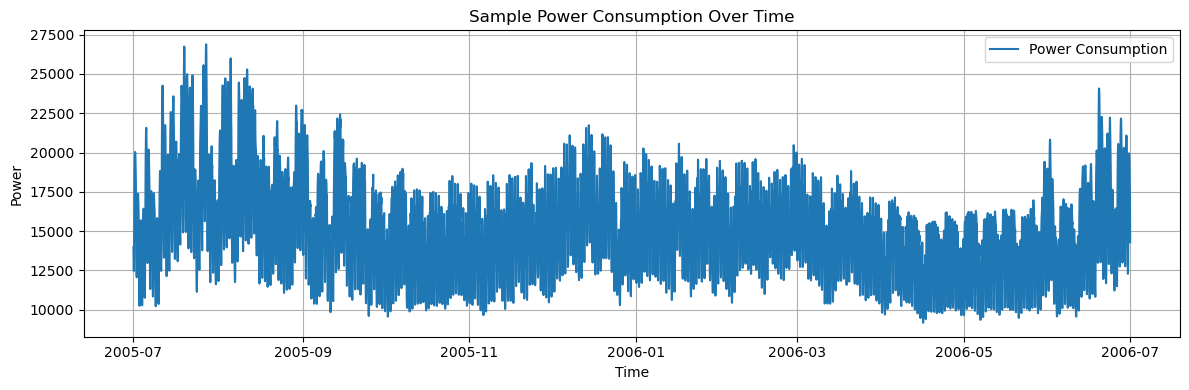

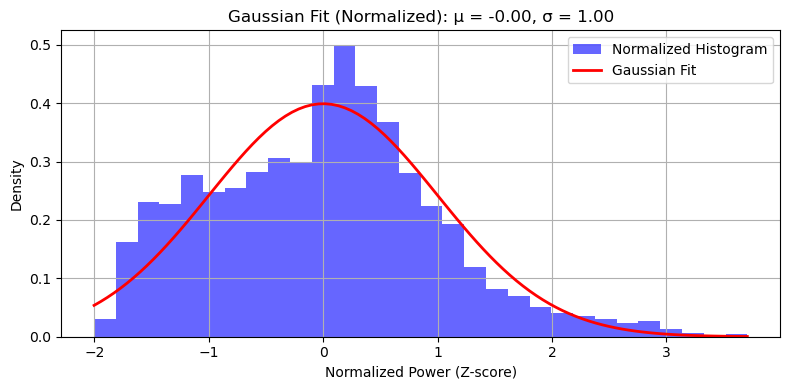

Mean Squared Error (normalized data) between histogram and Gaussian model: 0.0022767890


In [4]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

# Step 1: Load the Excel data
file_path = "datan.xlsx"  # Make sure the file is in the same directory as your notebook
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Step 2: Extract power and time values
power = df['Power'].values
time_values = pd.to_datetime(df['Datetime'])

# Step 3: Plot power consumption over time
plt.figure(figsize=(12, 4))
plt.plot(time_values, power, label='Power Consumption')
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Sample Power Consumption Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Normalize the power values (Z-score normalization)
normalized_power = (power - np.mean(power)) / np.std(power)

# Step 5: Fit Gaussian to normalized data
mu_norm, std_norm = norm.fit(normalized_power)
x = np.linspace(min(normalized_power), max(normalized_power), 100)
p = norm.pdf(x, mu_norm, std_norm)

# Step 6: Plot histogram of normalized data with Gaussian fit
plt.figure(figsize=(8, 4))
hist_vals, bins, _ = plt.hist(normalized_power, bins=30, density=True, alpha=0.6, color='b', label='Normalized Histogram')
plt.plot(x, p, 'r', linewidth=2, label='Gaussian Fit')
plt.title(f"Gaussian Fit (Normalized): μ = {mu_norm:.2f}, σ = {std_norm:.2f}")
plt.xlabel("Normalized Power (Z-score)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Calculate MSE between normalized histogram and Gaussian fit
hist_density_norm, bin_edges_norm = np.histogram(normalized_power, bins=30, density=True)
bin_centers_norm = (bin_edges_norm[:-1] + bin_edges_norm[1:]) / 2
gaussian_at_bins_norm = norm.pdf(bin_centers_norm, mu_norm, std_norm)
mse_norm = mean_squared_error(hist_density_norm, gaussian_at_bins_norm)

# Display MSE
print(f"Mean Squared Error (normalized data) between histogram and Gaussian model: {mse_norm:.10f}")



Bayesian Estimate (Normalized Data):
Posterior Mean (μ): 0.350738
Posterior Variance (σ²): 0.030906
Cramér-Rao Bound (CRB): 0.00000353


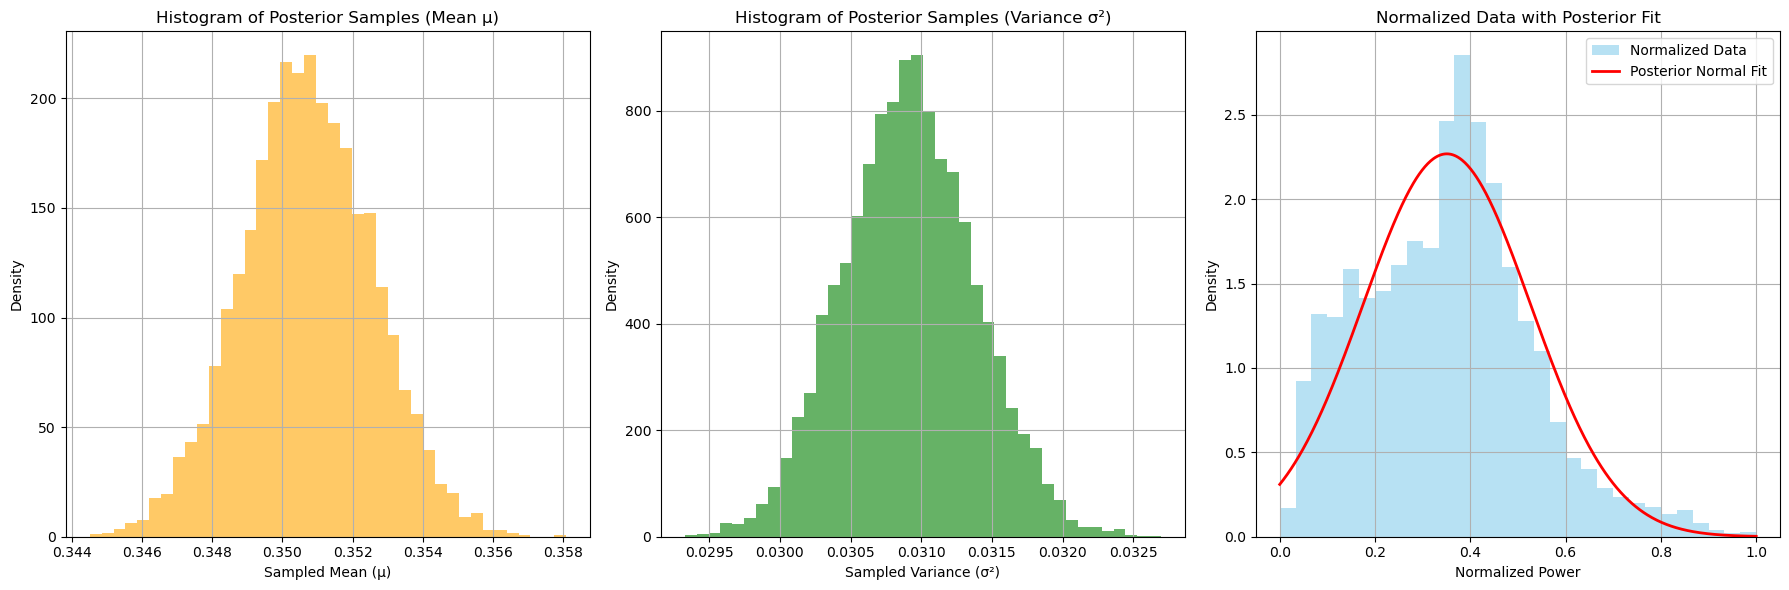

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma
from sklearn.preprocessing import MinMaxScaler

# ----- Load and Normalize Data -----
df = pd.read_excel("datan.xlsx")
df.dropna(inplace=True)
power_data = df['Power'].values.reshape(-1, 1)

scaler = MinMaxScaler()
normalized_power = scaler.fit_transform(power_data).flatten()

data = normalized_power

# ----- Prior Parameters -----
mu_0 = 0
lambda_0 = 1
alpha_0 = 2
beta_0 = 1

# ----- Sample Statistics -----
n = len(data)
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1)

# ----- Posterior Updates -----
lambda_n = lambda_0 + n
mu_n = (lambda_0 * mu_0 + n * sample_mean) / lambda_n
alpha_n = alpha_0 + n / 2
beta_n = beta_0 + 0.5 * (np.sum((data - sample_mean)**2) + (lambda_0 * n * (sample_mean - mu_0)**2) / lambda_n)

# ----- Posterior Estimates -----
posterior_mean = mu_n
posterior_var = beta_n / (alpha_n - 1)
crb = posterior_var / n

print("\nBayesian Estimate (Normalized Data):")
print(f"Posterior Mean (μ): {posterior_mean:.6f}")
print(f"Posterior Variance (σ²): {posterior_var:.6f}")
print(f"Cramér-Rao Bound (CRB): {crb:.8f}")

# ----- Posterior Sampling -----
n_samples = 10000
# Sample variances from inverse gamma
posterior_sigma2_samples = invgamma.rvs(a=alpha_n, scale=beta_n, size=n_samples)
# Given variance, sample means from Normal
posterior_mu_samples = norm.rvs(loc=mu_n, scale=np.sqrt(posterior_sigma2_samples / lambda_n))

# ----- Plotting -----
plt.figure(figsize=(18, 6))

# --- Histogram of Sampled Means ---
plt.subplot(1, 3, 1)
plt.hist(posterior_mu_samples, bins=40, density=True, alpha=0.6, color='orange')
plt.title("Histogram of Posterior Samples (Mean μ)")
plt.xlabel("Sampled Mean (μ)")
plt.ylabel("Density")
plt.grid(True)

# --- Histogram of Sampled Variances ---
plt.subplot(1, 3, 2)
plt.hist(posterior_sigma2_samples, bins=40, density=True, alpha=0.6, color='green')
plt.title("Histogram of Posterior Samples (Variance σ²)")
plt.xlabel("Sampled Variance (σ²)")
plt.ylabel("Density")
plt.grid(True)

# --- Histogram of Normalized Power Data with Fitted Normal ---
plt.subplot(1, 3, 3)
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Normalized Data')
x_vals = np.linspace(min(data), max(data), 500)
pdf_fit = norm.pdf(x_vals, loc=posterior_mean, scale=np.sqrt(posterior_var))
plt.plot(x_vals, pdf_fit, 'r', lw=2, label='Posterior Normal Fit')
plt.title("Normalized Data with Posterior Fit")
plt.xlabel("Normalized Power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


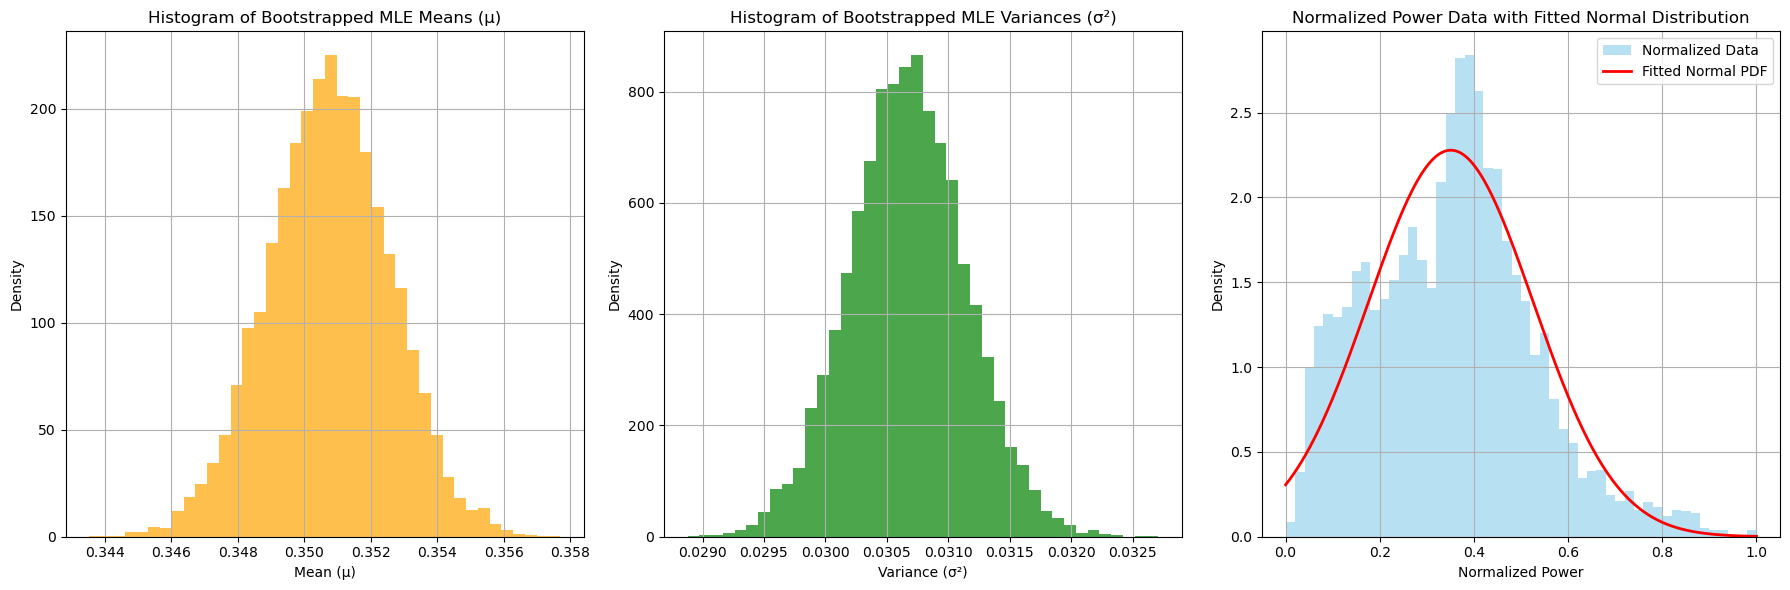


Normalized MLE Estimated Mean (μ): 0.350778
Normalized MLE Estimated Variance (σ²): 0.030671
Cramér-Rao Lower Bound (CRB) for μ: 0.00000350


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_excel("datan.xlsx")
df.dropna(inplace=True)

# Extract Power values and normalize
power_data = df['Power'].values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_power = scaler.fit_transform(power_data).flatten()

# MLE Estimates from full data
n = len(normalized_power)
mle_mean = np.mean(normalized_power)
mle_variance = np.var(normalized_power)
crb_mean = mle_variance / n

# ----- Bootstrapping for Sampling MLE Means and Variances -----
num_bootstrap_samples = 10000
bootstrap_means = []
bootstrap_variances = []

for _ in range(num_bootstrap_samples):
    sample = np.random.choice(normalized_power, size=n, replace=True)
    bootstrap_means.append(np.mean(sample))
    bootstrap_variances.append(np.var(sample))

# ----- Fitted Normal PDF for Original Data -----
x_vals = np.linspace(0, 1, 1000)
pdf = norm.pdf(x_vals, loc=mle_mean, scale=np.sqrt(mle_variance))

# ----- Plotting -----
plt.figure(figsize=(18, 6))

# 1. Histogram of Bootstrapped Means
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=40, density=True, color='orange', alpha=0.7)
plt.title("Histogram of Bootstrapped MLE Means (μ)")
plt.xlabel("Mean (μ)")
plt.ylabel("Density")
plt.grid(True)

# 2. Histogram of Bootstrapped Variances
plt.subplot(1, 3, 2)
plt.hist(bootstrap_variances, bins=40, density=True, color='green', alpha=0.7)
plt.title("Histogram of Bootstrapped MLE Variances (σ²)")
plt.xlabel("Variance (σ²)")
plt.ylabel("Density")
plt.grid(True)

# 3. Histogram of Normalized Data with Fitted Normal
plt.subplot(1, 3, 3)
plt.hist(normalized_power, bins=50, density=True, alpha=0.6, color='skyblue', label='Normalized Data')
plt.plot(x_vals, pdf, 'r', linewidth=2, label='Fitted Normal PDF')
plt.title("Normalized Power Data with Fitted Normal Distribution")
plt.xlabel("Normalized Power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ----- Display Estimates -----
print(f"\nNormalized MLE Estimated Mean (μ): {mle_mean:.6f}")
print(f"Normalized MLE Estimated Variance (σ²): {mle_variance:.6f}")
print(f"Cramér-Rao Lower Bound (CRB) for μ: {crb_mean:.8f}")


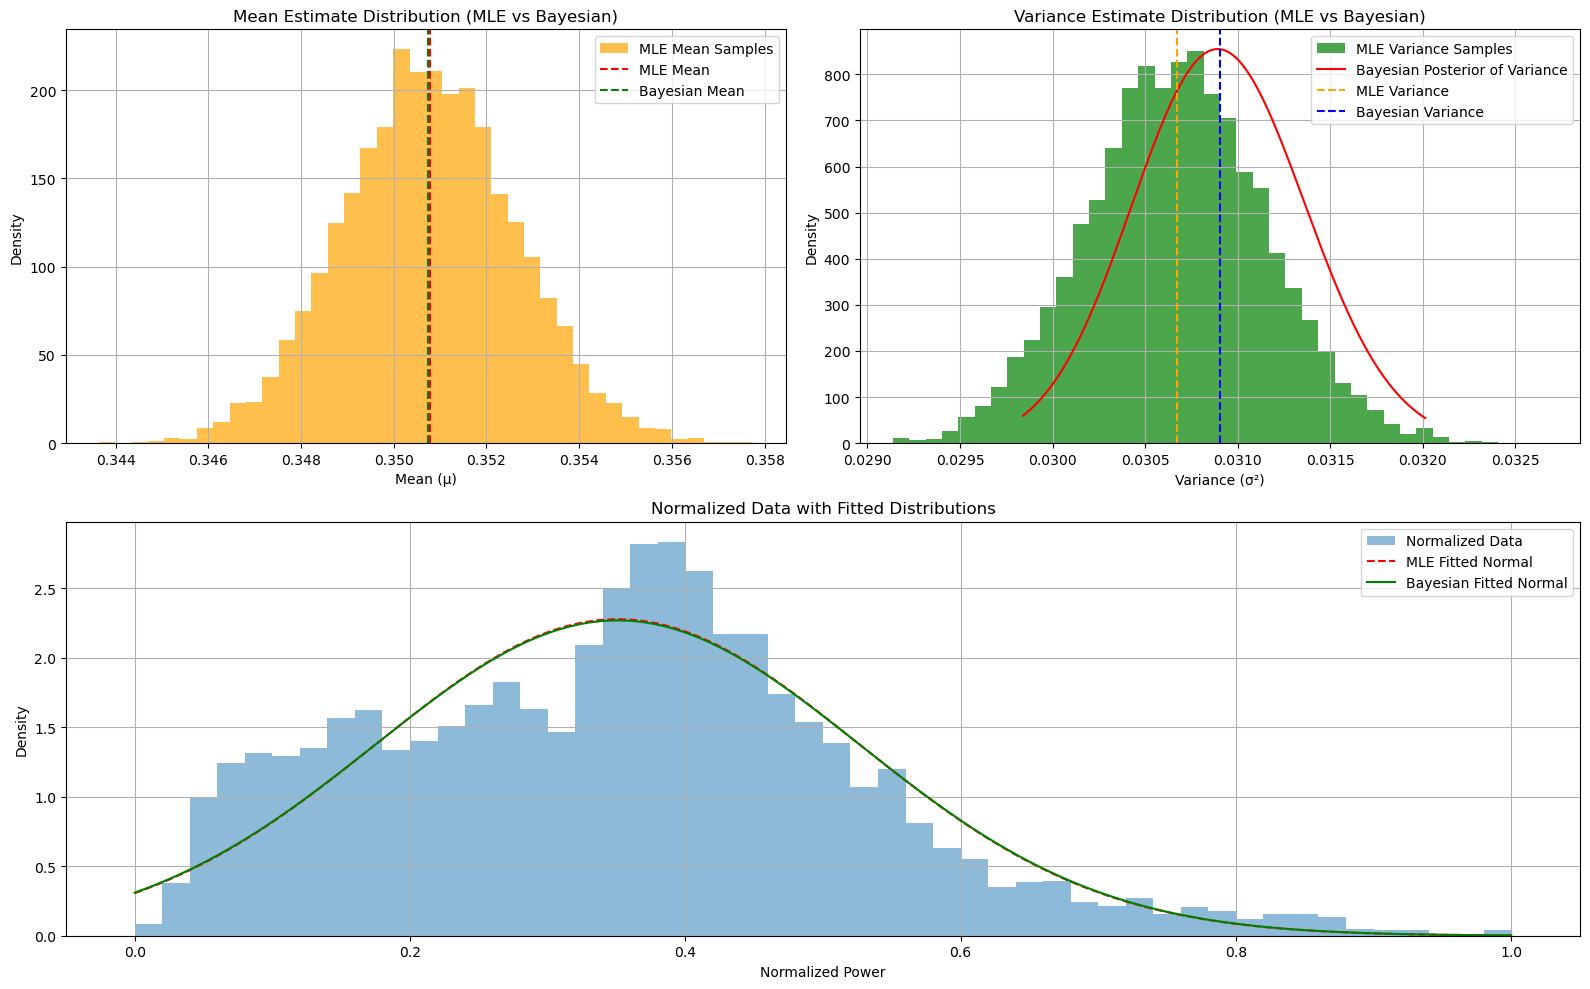


Comparison Table:
       Metric MLE Estimate Bayesian Estimate
     Mean (μ)     0.350778          0.350738
Variance (σ²)     0.030671          0.030906
      CRB (μ)   0.00000350        0.00000353


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma
from sklearn.preprocessing import MinMaxScaler

# Load and normalize data
df = pd.read_excel("datan.xlsx")
df.dropna(inplace=True)
power_data = df['Power'].values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_power = scaler.fit_transform(power_data).flatten()

# ---------- MLE ----------
n = len(normalized_power)
mle_mean = np.mean(normalized_power)
mle_var = np.var(normalized_power)
crb_mle = mle_var / n

# Bootstrap MLE estimates
num_samples = 10000
boot_means = []
boot_vars = []
for _ in range(num_samples):
    sample = np.random.choice(normalized_power, size=n, replace=True)
    boot_means.append(np.mean(sample))
    boot_vars.append(np.var(sample))

# ---------- Bayesian ----------
# Priors
mu_0 = 0
lambda_0 = 1
alpha_0 = 2
beta_0 = 1

sample_mean = np.mean(normalized_power)
sample_var = np.var(normalized_power, ddof=1)

lambda_n = lambda_0 + n
mu_n = (lambda_0 * mu_0 + n * sample_mean) / lambda_n
alpha_n = alpha_0 + n / 2
beta_n = beta_0 + 0.5 * (np.sum((normalized_power - sample_mean)**2) + (lambda_0 * n * (sample_mean - mu_0)**2) / lambda_n)

posterior_mean = mu_n
posterior_var = beta_n / (alpha_n - 1)
crb_bayes = posterior_var / n

# ---------- Visualization ----------
plt.figure(figsize=(16, 10))

# Histogram: MLE Mean
plt.subplot(2, 2, 1)
plt.hist(boot_means, bins=40, density=True, color='orange', alpha=0.7, label='MLE Mean Samples')
plt.axvline(mle_mean, color='red', linestyle='--', label='MLE Mean')
plt.axvline(posterior_mean, color='green', linestyle='--', label='Bayesian Mean')
plt.title("Mean Estimate Distribution (MLE vs Bayesian)")
plt.xlabel("Mean (μ)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Histogram: MLE Variance
plt.subplot(2, 2, 2)
plt.hist(boot_vars, bins=40, density=True, color='green', alpha=0.7, label='MLE Variance Samples')
x_sigma2 = np.linspace(invgamma.ppf(0.01, a=alpha_n, scale=beta_n),
                       invgamma.ppf(0.99, a=alpha_n, scale=beta_n), 500)
y_sigma2 = invgamma.pdf(x_sigma2, a=alpha_n, scale=beta_n)
plt.plot(x_sigma2, y_sigma2, 'r', label='Bayesian Posterior of Variance')
plt.axvline(mle_var, color='orange', linestyle='--', label='MLE Variance')
plt.axvline(posterior_var, color='blue', linestyle='--', label='Bayesian Variance')
plt.title("Variance Estimate Distribution (MLE vs Bayesian)")
plt.xlabel("Variance (σ²)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Histogram of Normalized Data + Fitted Normal
x_vals = np.linspace(0, 1, 1000)
pdf_mle = norm.pdf(x_vals, loc=mle_mean, scale=np.sqrt(mle_var))
pdf_bayes = norm.pdf(x_vals, loc=posterior_mean, scale=np.sqrt(posterior_var))

plt.subplot(2, 1, 2)
plt.hist(normalized_power, bins=50, density=True, alpha=0.5, label='Normalized Data')
plt.plot(x_vals, pdf_mle, 'r--', label='MLE Fitted Normal')
plt.plot(x_vals, pdf_bayes, 'g-', label='Bayesian Fitted Normal')
plt.title("Normalized Data with Fitted Distributions")
plt.xlabel("Normalized Power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------- Tabular Comparison ----------
import pandas as pd
summary_df = pd.DataFrame({
    "Metric": ["Mean (μ)", "Variance (σ²)", "CRB (μ)"],
    "MLE Estimate": [f"{mle_mean:.6f}", f"{mle_var:.6f}", f"{crb_mle:.8f}"],
    "Bayesian Estimate": [f"{posterior_mean:.6f}", f"{posterior_var:.6f}", f"{crb_bayes:.8f}"]
})

print("\nComparison Table:")
print(summary_df.to_string(index=False))
